##Importing Liberaries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import nltk
import string
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

KeyboardInterrupt: ignored

## Loading Data 

In [ ]:
data = pd.read_csv('train.csv', encoding='utf-8')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,..."
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...


In [ ]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,426340.000000,426340.000000,426340.000000,426340.000000,4.263400e+05
mean,284300.799618,1.733159,2.220244,4.183455,1.296222e+09
std,164012.600602,7.328184,8.014894,1.310577,4.808061e+07
min,1.000000,0.000000,0.000000,1.000000,9.408096e+08
25%,142363.750000,0.000000,0.000000,4.000000,1.271203e+09
50%,284308.500000,0.000000,1.000000,5.000000,1.311034e+09
75%,426183.250000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,844.000000,923.000000,5.000000,1.351210e+09



# Data Preprocessing

1. Removing **Punctuations**

2. Removing tokens which are not alphabetic

3. **Stopwords Removal**: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 

4. Removing Mentions

5. Removing URLs

6. Removing Emojis

8. Lowering Case of all words

9. Stemming all words


In [ ]:
import re

def remove_mentions(input_text):
  return re.sub(r'@\w+', '', input_text)

def remove_urls(input_text):
  return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)

def emoji_oneword(input_text):
  # By compressing the underscore, the emoji is kept as one word
  return input_text.replace('_','')

def remove_punctuation(input_text):
  # Make translation table
  punct = string.punctuation
  trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
  return input_text.translate(trantab)

def remove_digits(input_text):
  return re.sub('\d+', '', input_text)

def to_lower(input_text):
  return input_text.lower()

def remove_stopwords(input_text):
  stopwords_list = stopwords.words('english')
  # Some words which might indicate a certain sentiment are kept via a whitelist
  whitelist = ["n't", "not", "no"]
  words = input_text.split() 
  clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
  return " ".join(clean_words) 

def stemming(input_text):
  porter = PorterStemmer()
  words = input_text.split() 
  stemmed_words = [porter.stem(word) for word in words]
  return " ".join(stemmed_words)

def fit(X, y=None, **fit_params):
  return self

def transform(X):
  clean_X = remove_mentions(X)
  clean_X = remove_urls(clean_X)
  clean_X = emoji_oneword(clean_X)
  clean_X = remove_punctuation(clean_X)
  clean_X = remove_digits(clean_X)
  clean_X = to_lower(clean_X)
  clean_X = remove_stopwords(clean_X)
  clean_X = stemming(clean_X)
  return clean_X

def text_clean(X):
  clean_X = remove_mentions(X)
  clean_X = remove_urls(clean_X)
  clean_X = emoji_oneword(clean_X)
  clean_X = remove_punctuation(clean_X)
  clean_X = remove_digits(clean_X)
  clean_X = to_lower(clean_X)
  clean_X = remove_stopwords(clean_X)
  #clean_X = stemming(clean_X)
  return clean_X

In [ ]:
data['Cleaned'] = data['Text'].apply(text_clean)

In [ ]:
data['Cleaned'][0]

'received product early seller tastey great mid day snack shared glutten free friends ordering product soon'

**Tokenization** is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Also, we remove "br" token from our dataset.


In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

train_data = list()

lines = data['Cleaned'].values.tolist()

for line in lines:
  tokens = word_tokenize(line)
  words = [w for w in tokens if not w == 'br']
  train_data.append(words)

In [ ]:
train_data[0]

['received',
 'product',
 'early',
 'seller',
 'tastey',
 'great',
 'mid',
 'day',
 'snack',
 'shared',
 'glutten',
 'free',
 'friends',
 'ordering',
 'product',
 'soon']

**Creating a list of all tokens and save them in one column in the datafram**

In [ ]:
data['cleaned_reviews'] = train_data

In [ ]:
data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned,cleaned_reviews
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...,received product early seller tastey great mid...,"[received, product, early, seller, tastey, gre..."


### **Word2Vec**

In [ ]:
import gensim
EMBEDDING_DIM = 100

model = gensim.models.Word2Vec(sentences=data['cleaned_reviews'],\
                               size=EMBEDDING_DIM, window=5, min_count=1)
words = list(model.wv.vocab)

print("Vocabulary size: %d" % len(words))

Vocabulary size: 94744


Lets test our Word2Vec Model to see how it performs using utility functions provided in Gensim

In [ ]:
model.wv.most_similar('product')

[('item', 0.6845788955688477),
 ('products', 0.5801945924758911),
 ('seller', 0.508390486240387),
 ('aspartime', 0.50532466173172),
 ('however', 0.48050737380981445),
 ('judgement', 0.4644555449485779),
 ('shampoo', 0.4641536772251129),
 ('merchandise', 0.4627348780632019),
 ('conditioner', 0.45580047369003296),
 ('vendor', 0.43671494722366333)]

Let’s see the result of semantically reasonable word vectors (actress - actor + heroine)


## Save model in ASCII (word2vec) format

In [ ]:
filename = 'word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

## Load the embeddings from the file into a dictionary

In [ ]:
import os
embeddings_index = {}
f = open('word2vec.txt', encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embeddings_index[word] = coefs

f.close()

**Tokenization** is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. 

**Padding** All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our model e.g. LSTM, not all the sentences have the same length. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary.

**Splitting the data** 

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(data['cleaned_reviews'])
sequences = tokenizer_obj.texts_to_sequences(data['cleaned_reviews'])

max_length = 100

word_index = tokenizer_obj.word_index
review_pad = pad_sequences(sequences,maxlen=max_length)
sentiment = data['Score'].values

print(review_pad.shape)
print(sentiment.shape)

indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
sentiment = sentiment[indices]

X_train_pad, X_val_pad, y_train, y_val =\
train_test_split(review_pad, sentiment, test_size=0.2)

print(len(X_train_pad), len(y_train), len(X_val_pad) + len(y_val))

(426340, 100)
(426340,)
341072 341072 170536


In [ ]:
print(X_train_pad.shape , y_train.shape)
print(X_val_pad.shape , y_val.shape)

(341072, 100) (341072,)
(85268, 100) (85268,)


## Creating an Embedding Matrix

In [ ]:
EMBEDDING_DIM = 100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

## Creating the model

Defining the Model

In Keras, A **Sequential model** is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
1. Load pre-trained word embeddings into an Embedding layer

2. Adding Bidirectional LSTM Layer

3. Adding Dense Layer

**model.compile** used to Configures the model for training.



In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

model = tf.keras.Sequential([
    # Add an Embedding layer with output embedding dimension of size 100 we set at the top
    tf.keras.layers.Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(EMBEDDING_DIM)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(EMBEDDING_DIM, activation='tanh'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          9474500   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 9,656,006
Trainable params: 181,506
Non-trainable params: 9,474,500
_________________________________________________________________


## Training the Model

Use the .fit method.

Assign the model.fit() method to a variable, which will store the Training, Validation Loss and Accuracy for each epoch. 

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 20
history = model.fit(X_train_pad, y_train, epochs=num_epochs, validation_data=(X_val_pad, y_val), verbose=2)

Epoch 1/20
10659/10659 - 1383s - loss: 0.7359 - accuracy: 0.7261 - val_loss: 0.6979 - val_accuracy: 0.7378
Epoch 2/20
10659/10659 - 1352s - loss: 0.6512 - accuracy: 0.7571 - val_loss: 0.6664 - val_accuracy: 0.7564
Epoch 3/20
10659/10659 - 1359s - loss: 0.6024 - accuracy: 0.7778 - val_loss: 0.6466 - val_accuracy: 0.7636
Epoch 4/20
10659/10659 - 1362s - loss: 0.5638 - accuracy: 0.7935 - val_loss: 0.6445 - val_accuracy: 0.7675
Epoch 5/20
10659/10659 - 1359s - loss: 0.5383 - accuracy: 0.8042 - val_loss: 0.6504 - val_accuracy: 0.7675
Epoch 6/20
10659/10659 - 1361s - loss: 0.5118 - accuracy: 0.8139 - val_loss: 0.6618 - val_accuracy: 0.7634
Epoch 7/20
10659/10659 - 1357s - loss: 0.4909 - accuracy: 0.8226 - val_loss: 0.6532 - val_accuracy: 0.7724
Epoch 8/20
10659/10659 - 1361s - loss: 0.4759 - accuracy: 0.8289 - val_loss: 0.6528 - val_accuracy: 0.7760
Epoch 9/20
10659/10659 - 1361s - loss: 0.4618 - accuracy: 0.8340 - val_loss: 0.6664 - val_accuracy: 0.7750
Epoch 10/20


## Evaluating the Model on Test Set

**Score** is the evaluation of the loss function for a given input.

**Accuracy** How accurate your model's prediction is compared to the true data.


In [ ]:
X_test = pd.read_csv('test.csv', encoding='utf-8')
y_test = pd.read_csv('labels.csv', encoding='utf-8')

In [ ]:
X_test['Cleaned'] = X_test['Text'].apply(text_clean)

In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

test_data = list()

lines = X_test['Cleaned'].values.tolist()

for line in lines:
  tokens = word_tokenize(line)
  words = [w for w in tokens if not w == 'br']
  test_data.append(words)

In [ ]:
X_test['cleaned_review'] = test_data

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(X_test['cleaned_review'])
sequences = tokenizer_obj.texts_to_sequences(X_test['cleaned_review'])

max_length = 100

word_index = tokenizer_obj.word_index
test_review_pad = pad_sequences(sequences,maxlen=max_length)
test_sentiment = y_test['Score'].values

print(test_review_pad.shape)
print(test_sentiment.shape)

indices = np.arange(test_review_pad.shape[0])
np.random.shuffle(indices)
test_review_pad = test_review_pad[indices]
test_sentiment = test_sentiment[indices]

X_test_pad = test_review_pad
y_test = test_sentiment

(142114, 100)
(142114,)


In [ ]:
score, acc = model.evaluate(X_test_pad, y_test, batch_size=128)

print('Test Score:', score)
print('Test accuracy:', acc)

1111/1111 [==============================] - 8s 7ms/step - loss: 1.8692 - accuracy: 0.5179
Test Score: 1.8691624402999878
Test accuracy: 0.5179222226142883


## Plotting the Accuracy and Loss 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


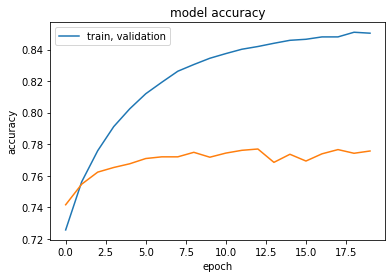

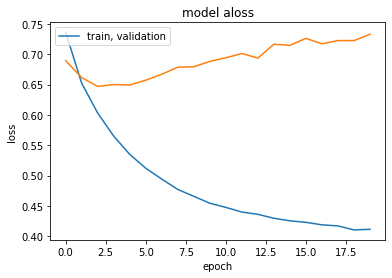

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train, validation'], loc = 'upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model aloss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train, validation'], loc = 'upper left')
plt.show()